a :
beta :
[-0.33333333  3.66666667]
0.3846153846153846

ridge :
lambda : 1.3
CVSS : 20.720000000000013
regression :
[2.66453526e-15 3.20000000e+00]

lasso :
lambda : 6.2
CVSS : 25.020000000000003
regression :
[1.55431223e-15 1.90000000e+00]


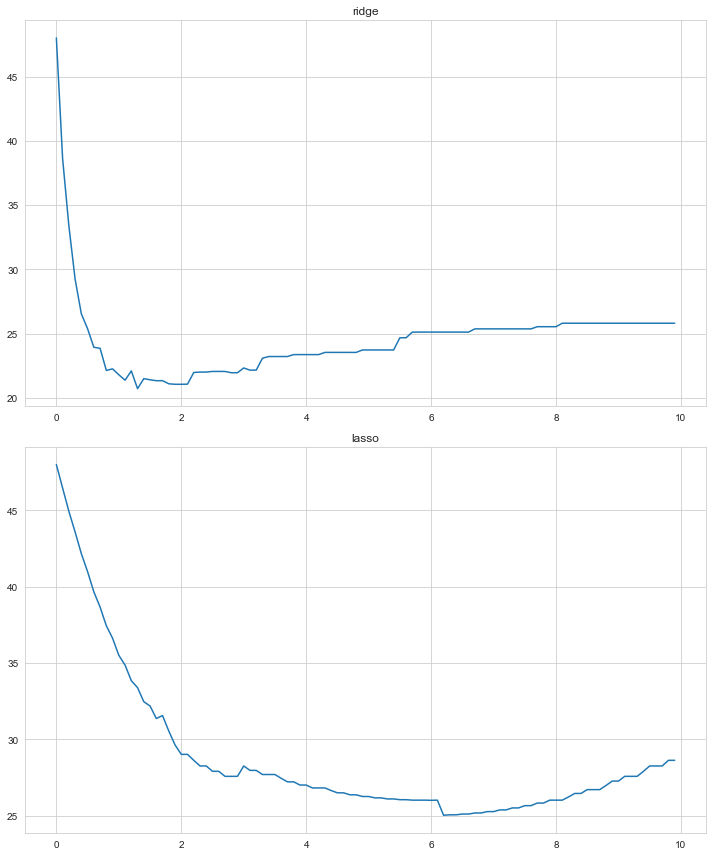

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np


sample = np.array([[1, 0, 1], [0, 1, 5], [1, 1, 2]])
x = sample[:, :2]
y = sample[:, 2]

psi = x


TSS = np.sum((y - np.mean(y))**2)
F_inv = np.linalg.inv(psi.T@psi)
beta = (F_inv@psi.T)@y
RSS = np.sum((y - psi@beta)**2)
R_square = 1 - RSS/TSS

print ("a :\nbeta :")
print (beta)
print (R_square)

# ridge

lamda = np.arange(0, 10, 0.1)
t = np.arange(0, 10, 0.1)
t_best = np.zeros((len(x), len(lamda)), float)

CVSS = np.zeros((len(x), len(lamda)), float)
for i in range(len(x)):
	x_i = np.delete(x, i, axis=0)
	y_i = np.delete(sample[:, 2], i, axis=0)
	for j, lamda_j in enumerate(lamda):
		L = 1000000000
		t_n = -1
		b1_b = 0
		b2_b = 0
		for k, t_k in enumerate(t):
			for b1 in np.arange(-1*t_k, t_k, 0.1):
				#1
				b2 = t_k - abs(b1)
				b = np.array([b1, b2])
				L_b = (np.sum((y_i - x_i@b)**2) + lamda_j*(b1**2 + b2**2))
				if L_b < L:
					L = L_b
					t_n = k
					b1_b = b1
					b2_b = b2
				#2
				b2 = abs(b1) - t_k
				b = np.array([b1, b2])
				L_b = (np.sum((y_i - x_i@b)**2) + lamda_j*(b1**2 + b2**2))
				if L_b < L:
					L = L_b
					t_n = k
					b1_b = b1
					b2_b = b2
		t_best[i][j] = t_n
		CVSS[i][j] = (y[i] - (b1_b*x[i][0] + b2_b*x[i][1]))**2

CVSS_sum_r = CVSS[0] + CVSS[1] + CVSS[2]
CVSS_minN = np.argmin(CVSS_sum_r)
CVSS_min = CVSS_sum_r[CVSS_minN]
lamda_min = lamda[CVSS_minN]
t_min = np.max(t_best[:, CVSS_minN])

t = np.arange(0, t_min, 0.1)
L = 1000000000
t_n = -1
b1_b = 0
b2_b = 0
for k, t_k in enumerate(t):
	for b1 in np.arange(-1*t_k, t_k, 0.1):
		#1
		b2 = t_k - abs(b1)
		b = np.array([b1, b2])
		L_b = (np.sum((y - x@b)**2) + lamda_min*(abs(b1) + abs(b2)))
		if L_b < L:
			L = L_b
			t_n = k
			b1_b = b1
			b2_b = b2
		#2
		b2 = abs(b1) - t_k
		b = np.array([b1, b2])
		L_b = (np.sum((y - x@b)**2) + lamda_min*(abs(b1) + abs(b2)))
		if L_b < L:
			L = L_b
			t_n = k
			b1_b = b1
			b2_b = b2


b_b = np.array([b1_b, b2_b])
print ("\nridge :\nlambda : " + str(lamda_min))
print ("CVSS : " + str(CVSS_min) + "\nregression :")
print (b_b)

# lasso

lamda = np.arange(0, 10, 0.1)
t = np.arange(0, 10, 0.1)
t_best = np.zeros((len(x), len(lamda)), float)

CVSS = np.zeros((len(x), len(lamda)), float)
for i in range(len(x)):
	x_i = np.delete(x, i, axis=0)
	y_i = np.delete(sample[:, 2], i, axis=0)
	for j, lamda_j in enumerate(lamda):
		L = 1000000000
		t_n = -1
		b1_b = 0
		b2_b = 0
		for k, t_k in enumerate(t):
			for b1 in np.arange(-1*t_k, t_k, 0.1):
				#1
				b2 = t_k - abs(b1)
				b = np.array([b1, b2])
				L_b = (np.sum((y_i - x_i@b)**2) + lamda_j*(abs(b1) + abs(b2)))
				if L_b < L:
					L = L_b
					t_n = k
					b1_b = b1
					b2_b = b2
				#2
				b2 = abs(b1) - t_k
				b = np.array([b1, b2])
				L_b = (np.sum((y_i - x_i@b)**2) + lamda_j*(abs(b1) + abs(b2)))
				if L_b < L:
					L = L_b
					t_n = k
					b1_b = b1
					b2_b = b2
		t_best[i][j] = t_n
		CVSS[i][j] = (y[i] - (b1_b*x[i][0] + b2_b*x[i][1]))**2

CVSS_sum_l = CVSS[0] + CVSS[1] + CVSS[2]
CVSS_minN = np.argmin(CVSS_sum_l)
CVSS_min = CVSS_sum_l[CVSS_minN]
lamda_min = lamda[CVSS_minN]
t_min = np.max(t_best[:, CVSS_minN])

t = np.arange(0, t_min, 0.1)
L = 1000000000
t_n = -1
b1_b = 0
b2_b = 0
for k, t_k in enumerate(t):
	for b1 in np.arange(-1*t_k, t_k, 0.1):
		#1
		b2 = t_k - abs(b1)
		b = np.array([b1, b2])
		L_b = (np.sum((y - x@b)**2) + lamda_min*(abs(b1) + abs(b2)))
		if L_b < L:
			L = L_b
			t_n = k
			b1_b = b1
			b2_b = b2
		#2
		b2 = abs(b1) - t_k
		b = np.array([b1, b2])
		L_b = (np.sum((y - x@b)**2) + lamda_min*(abs(b1) + abs(b2)))
		if L_b < L:
			L = L_b
			t_n = k
			b1_b = b1
			b2_b = b2


b_b = np.array([b1_b, b2_b])
print ("\nlasso :\nlambda : " + str(lamda_min))
print ("CVSS : " + str(CVSS_min) + "\nregression :")
print (b_b)



fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(lamda, CVSS_sum_r)
axs[0].set_title("ridge")

axs[1].plot(lamda, CVSS_sum_l)
axs[1].set_title("lasso")


plt.tight_layout()
plt.show()
